<a href="https://colab.research.google.com/github/vamado09/Applied-Data-Science/blob/main/Week10_VicenteDeLeon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vicente De Leon

IU_id: 2001014594

APPLIED DATA SCIENCE: 9998

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Exploring Time Series

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
- index_col = 0 - Column to use as the row labels
- header = 0 - Row to use for header names
- parse dates=True - First column has dates

I was having issues running the code using squeeze*

In [8]:
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=[0])
series.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


The below graph shows how temprature vary within each year, with a rising and falling behaviours due to seasonal changes:

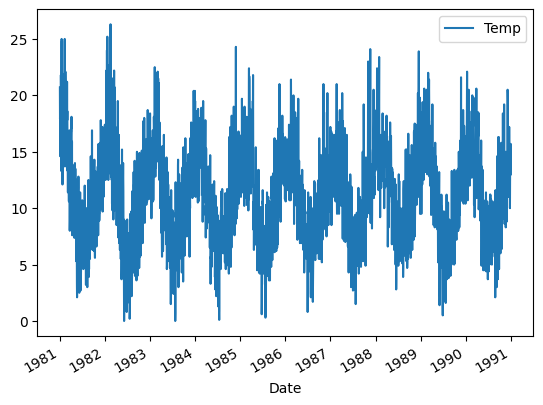

In [6]:
series.plot()
plt.show()

In [9]:
series.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


# Data Comparison

It is helpful to compare data for the same interval (year-to-year, day-to-day):
- use pandas Grouper https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html
- specify frequency for grouping https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

     freq = "M" - grouped by month

     freq = "A" - grouped by year

     freq = "W" - grouped by week

## Annual Data Comparison

I had to change some parts of the code because I was getting the following error:

"ValueError: Per-column arrays must each be 1-dimensional"

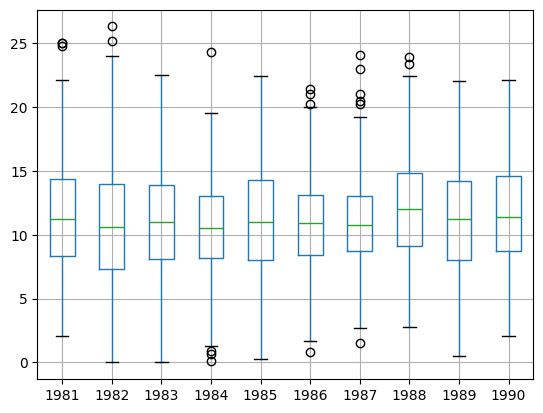

In [12]:
groups = series.groupby(pd.Grouper(freq='A')) # Annual grouping by year
years = {}  # empty dictionary

for name, group in groups:
    years[name.year] = group.squeeze().values # populating using year values
                                              # Ensure each group is 1-dimensional

# dict to df
years_df = pd.DataFrame(years)
years_df.boxplot()
plt.show()

                 Temp
Date                 
1990-01-31  15.577419
1990-02-28  15.417857
1990-03-31  14.835484
1990-04-30  13.433333
1990-05-31   9.748387
1990-06-30   7.720000
1990-07-31   8.183871
1990-08-31   7.825806
1990-09-30   9.166667
1990-10-31  11.345161
1990-11-30  12.656667
1990-12-31  14.367742


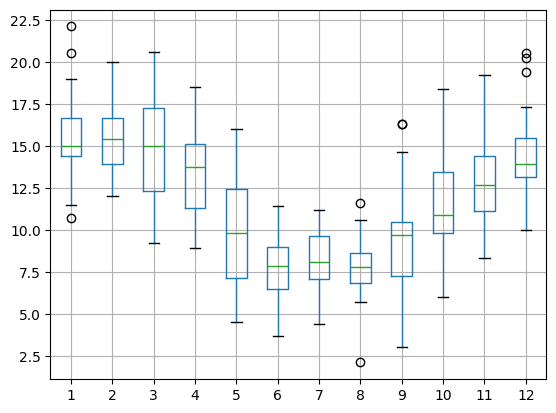

In [14]:
one_year = series[series.index.year == 1990] # had to change the how due to series is loaded
# one_year = series['1990']
ts = one_year.groupby(pd.Grouper(freq='M')) # grouping by month
print(ts.mean())

months = pd.concat([pd.DataFrame(t[1].values) for t in ts], axis=1) # concatenainge each month's values as columns in the df
months.columns = range(1, 13) # setting columns to represent months

months.boxplot()
plt.show()

# Decomposition

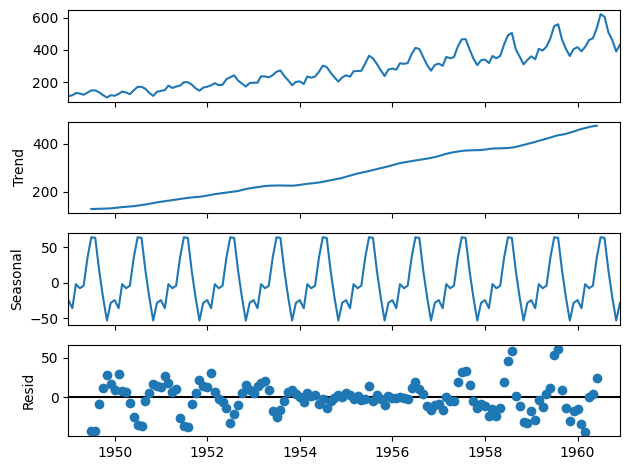

In [16]:
series = pd.read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True)
result = seasonal_decompose(series, model='additive') # decomposing the series

result.plot()
plt.show()

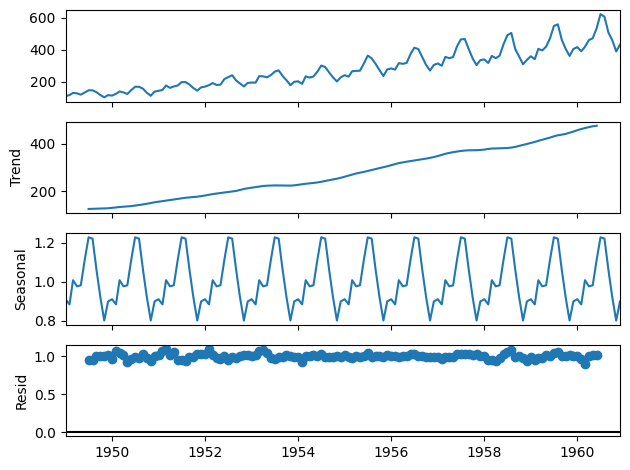

In [17]:
series = pd.read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True)
result = seasonal_decompose(series, model='multiplicative') # decomposing the series with a multiplicative model

result.plot()
plt.show()

# Autoregression Model

An autoregression model is a linear regression model that uses lagged variables as input variables.

- RMSE: The root mean squared error criterion is a method to test if if an AR model is accurate in making future predictions. RMSE is calculated as the mean squared errors of all the residuals and taking the square root.

- The below model is created using 29 lags -> it checks at the previous 29 days to predict the next day.

In [19]:
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True)

X = series.values # features
train, test = X[1:len(X)-7], X[len(X)-7:] # split into train / test sets

# autoregression model
model = AutoReg(train, lags=29)
model_fit = model.fit()

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

# RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test RMSE: 1.225


RMSE -> 1.225, which means the model's predictions are (on avg), 1.225 degrees off from the actual values.

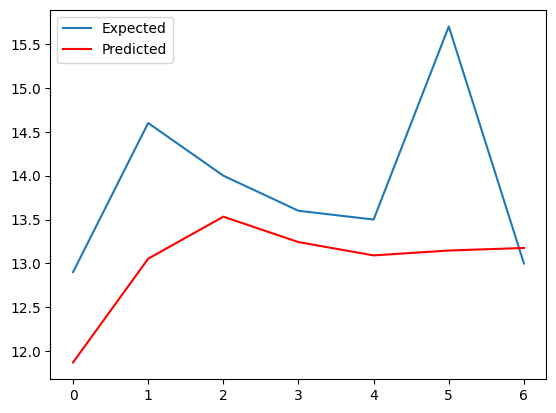

In [20]:
plt.plot(test, label='Expected')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()

The discrepancy shows a gap between the predicted vs expected values, which contributes to the overall error (RMSE -> 1.225). The forecast deviataion is about 1 degree Celsius out each day, and a large big deviation on day 5.

Note for myself: I can use Statsmodel to predict pricing seasonality/trend (Thanksgiving, Christmas, 4th of July etc).****

# Sources:

- Statsmodel Autoregression: https://www.statsmodels.org/devel/generated/statsmodels.tsa.ar_model.AutoReg.html


- RMSE: https://prepnuggets.com/glossary/root-mean-squared-error-criterion/#:~:text=The%20root%20mean%20squared%20error,of%20two%20different%20AR%20models.
